# Dataset Ispa

In [3]:
# Import library pandas
import pandas as pd

# Menampilkan dataset dari file CSV
dataset = pd.read_csv('ispa_data.csv')
dataset.head(10)

,Nama,Gender,Umur,Batuk,Demam,Pilek,Sesak Napas,Radang Tenggorokan,TD sistolik (mmhg),TD diastolik (mmhg),ND (x/mnt),RR (x/mnt),S,Kategori
0,Mofli,L,67,0,1,0,0,1,110,70,80,20,37.5,Non pneunomia
1,Munawwir,P,45,0,1,0,0,0,110,70,80,20,37.5,Non pneunomia
2,Abd. Rohman,L,25,1,1,1,1,0,110,70,80,20,38.2,pneunomia
3,Hoinul Anam,L,35,1,1,0,1,1,110,70,80,18,38.5,pneunomia
4,Atour Rohman,L,46,1,1,0,0,0,110,70,80,20,36.5,Non pneunomia
5,Hamimah,P,66,1,1,0,1,1,110,70,80,20,38.2,pneunomia
6,Lucy Mahakam,L,58,1,1,0,0,0,110,70,80,20,38.2,Non pneunomia
7,Putri Fajn. M,P,56,1,1,1,1,0,110,70,80,20,38.2,pneunomia
8,Rismawati Dewi,P,24,1,1,0,0,0,110,70,80,20,38.2,Non pneunomia
9,Subaidah,P,87,1,1,0,0,0,110,70,80,20,38.2,Non pneunomia


Data yang digunakan dalam penelitian ini berupa data ispa (infeksi saluran pernapasan akut) yang diperoleh puskesmas tongguh. Data terdiri dari 14 kolom dan 113 baris. Untuk 13 kolom berupa atribut dan 1 kolom merupakan target/kategori. Untuk kategorinya sendiri berupa pneunomia untuk yang positif dan non pneunomia untuk yang negatif. Untuk data berupa kategorikal, untuk angka 0 merupakan No dan untuk angka 1 merupakan Yes. Untuk jumlah non pneunomia sebanyak 48 orang dan untuk jumlah pneunomia sebanyak 65 orang

# Cleaning data (hapus fitur)

In [4]:
#hapus fitur 
hapus_fitur = pd.DataFrame(dataset)

kolom_yang_dihapus = ['Nama','TD sistolik (mmhg)', 'TD diastolik (mmhg)', 'ND (x/mnt)']
hapus_fitur = hapus_fitur.drop(columns=kolom_yang_dihapus)

# Menampilkan DataFrame setelah menghapus kolom
hapus_fitur.head(10)


,Gender,Umur,Batuk,Demam,Pilek,Sesak Napas,Radang Tenggorokan,RR (x/mnt),S,Kategori
0,L,67,0,1,0,0,1,20,37.5,Non pneunomia
1,P,45,0,1,0,0,0,20,37.5,Non pneunomia
2,L,25,1,1,1,1,0,20,38.2,pneunomia
3,L,35,1,1,0,1,1,18,38.5,pneunomia
4,L,46,1,1,0,0,0,20,36.5,Non pneunomia
5,P,66,1,1,0,1,1,20,38.2,pneunomia
6,L,58,1,1,0,0,0,20,38.2,Non pneunomia
7,P,56,1,1,1,1,0,20,38.2,pneunomia
8,P,24,1,1,0,0,0,20,38.2,Non pneunomia
9,P,87,1,1,0,0,0,20,38.2,Non pneunomia


Dilakukan penghapusan fitur Nama karena hal ini menyangkut penyakit seseorang tersebut, sehingga sebaiknya dilakukan penghapusan fitur untuk nama agar data pasien tetap aman dan penyakitnya tidak diketahui orang lain yang tidak dikehendaki. Untuk fitur Tekanan darah sistole, tekanan darah distole dan Nadi dilakukan penghapusan karena dari jurnal yang telah saya baca, kebanyakan tidak memakai fitur ini.

# Normalisasi (Min Max)

In [5]:
# Membuat DataFrame dari dataset
df = pd.DataFrame(hapus_fitur)

# Daftar kolom yang akan dinormalisasi
kolom_normalisasi = ['Umur', 'RR (x/mnt)', 'S']

# Fungsi Min-Max Scaling
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Melakukan normalisasi Min-Max Scaling pada kolom yang dipilih
for kolom in kolom_normalisasi:
    df[kolom] = min_max_scaling(df[kolom])

# Tampilkan hasil normalisasi
print(df)


    Gender      Umur  Batuk  Demam  Pilek  Sesak Napas  Radang Tenggorokan  \
0        L  0.726027      0      1      0            0                   1   
1        P  0.424658      0      1      0            0                   0   
2        L  0.150685      1      1      1            1                   0   
3        L  0.287671      1      1      0            1                   1   
4        L  0.438356      1      1      0            0                   0   
..     ...       ...    ...    ...    ...          ...                 ...   
108      P  0.109589      1      1      0            1                   1   
109      L  0.383562      1      1      0            0                   0   
110      L  0.397260      1      1      1            0                   0   
111      L  0.520548      1      1      1            1                   0   
112      L  0.534247      1      1      1            1                   0   

     RR (x/mnt)         S       Kategori  
0           1.0  0.5

Untuk normalisasi dilakukan dengan min max normalisasi. Normalisasi dilakukan pada kolom umur, RR (respirasi), dan S (Suhu)

# Missing Value

In [6]:
# Mengecek Missing Value
hapus_fitur.isnull().values.any()

False

In [84]:
# Mengecek data kosong (NaN)
hapus_fitur.isnull().sum().sum()

0

Code diatas merupakan pengecekan untuk missing value. Setelah dilakukan pengecekan, tidak ada missing value yang perlu ditangani.

# Preprocessing

# Transformasi

In [7]:
data = df

# Membagi dataset menjadi X dan y
X = data.iloc[:, :-1].values
y = data.iloc[:, 9].values

print (X)
print (y)

[['L' 0.726027397260274 0 ... 1 1.0 0.5142857142857135]
 ['P' 0.4246575342465753 0 ... 0 1.0 0.5142857142857135]
 ['L' 0.1506849315068493 1 ... 0 1.0 0.7142857142857143]
 ...
 ['L' 0.3972602739726027 1 ... 0 1.0 0.8285714285714282]
 ['L' 0.5205479452054794 1 ... 0 1.0 0.7428571428571412]
 ['L' 0.5342465753424658 1 ... 0 1.0 0.971428571428571]]
['Non pneunomia' 'Non pneunomia' 'pneunomia' 'pneunomia' 'Non pneunomia'
 'pneunomia' 'Non pneunomia' 'pneunomia' 'Non pneunomia' 'Non pneunomia'
 'pneunomia' 'pneunomia' 'Non pneunomia' 'Non pneunomia' 'pneunomia'
 'Non pneunomia' 'pneunomia' 'Non pneunomia' 'Non pneunomia'
 'Non pneunomia' 'Non pneunomia' 'pneunomia' 'Non pneunomia'
 'Non pneunomia' 'Non pneunomia' 'pneunomia' 'Non pneunomia'
 'Non pneunomia' 'pneunomia' 'Non pneunomia' 'Non pneunomia'
 'Non pneunomia' 'pneunomia' 'Non pneunomia' 'Non pneunomia'
 'Non pneunomia' 'Non pneunomia' 'pneunomia' 'Non pneunomia'
 'Non pneunomia' 'pneunomia' 'Non pneunomia' 'Non pneunomia'
 'Non pneuno

In [8]:
from sklearn.preprocessing import LabelEncoder

# Menerapkan Label Encoding pada fitur kategori dalam X
label_encoder = LabelEncoder()

# Iterasi melalui setiap kolom dalam X
for i in range(X.shape[1]):
    if isinstance(X[0, i], str):  # Memeriksa apakah kolom ini adalah tipe data string (kategori)
        X[:, i] = label_encoder.fit_transform(X[:, i])

print(X)


[[0 0.726027397260274 0 ... 1 1.0 0.5142857142857135]
 [1 0.4246575342465753 0 ... 0 1.0 0.5142857142857135]
 [0 0.1506849315068493 1 ... 0 1.0 0.7142857142857143]
 ...
 [0 0.3972602739726027 1 ... 0 1.0 0.8285714285714282]
 [0 0.5205479452054794 1 ... 0 1.0 0.7428571428571412]
 [0 0.5342465753424658 1 ... 0 1.0 0.971428571428571]]


In [9]:
# Membuat DataFrame Pandas dari hasil transformasi
X_encoded = pd.DataFrame(X, columns=data.columns[:-1])

# Menampilkan DataFrame dengan tipe data yang benar
print(X_encoded)

X_encoded.to_excel('data_transformasi.xlsx', index=False)

    Gender      Umur Batuk Demam Pilek Sesak Napas Radang Tenggorokan  \
0        0  0.726027     0     1     0           0                  1   
1        1  0.424658     0     1     0           0                  0   
2        0  0.150685     1     1     1           1                  0   
3        0  0.287671     1     1     0           1                  1   
4        0  0.438356     1     1     0           0                  0   
..     ...       ...   ...   ...   ...         ...                ...   
108      1  0.109589     1     1     0           1                  1   
109      0  0.383562     1     1     0           0                  0   
110      0   0.39726     1     1     1           0                  0   
111      0  0.520548     1     1     1           1                  0   
112      0  0.534247     1     1     1           1                  0   

    RR (x/mnt)         S  
0          1.0  0.514286  
1          1.0  0.514286  
2          1.0  0.714286  
3          0.0 

Dilakukan transformasi pada fitur atau kolom Gender yang sebelumnya L dan P diubah menjadi 0 dan 1, Untuk L diubah menjadi 0 dan P diubah menjadi 1

In [10]:
# Mengkodekan Variabel Dependen (y)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
transform_y = le.fit_transform(y)
print("Hasil transformasi y:")
print(transform_y)

Hasil transformasi y:
[0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1]


In [11]:
tabel_y = pd.DataFrame(transform_y, columns=['Target'])
print("Hasil transformasi y:")
print(tabel_y)

Hasil transformasi y:
     Target
0         0
1         0
2         1
3         1
4         0
..      ...
108       1
109       0
110       1
111       1
112       1

[113 rows x 1 columns]


Dilakukan transformasi untuk kategori atau target yang sebelumnya pneunomia dan non penunomia diubah menjadi 0 dan 1. Untuk non pneunomia diubah menjadi 0 dan untuk pneunomia diubah menjadi 1

# Korelasi Data (Pearson)

In [12]:
# Menggabungkan DataFrame X dan y
final_dataset = pd.concat([X_encoded, tabel_y], axis=1)

# Menampilkan dataset hasil penggabungan
print("Hasil penggabungan X dan y:")
print(final_dataset)

Hasil penggabungan X dan y:
    Gender      Umur Batuk Demam Pilek Sesak Napas Radang Tenggorokan  \
0        0  0.726027     0     1     0           0                  1   
1        1  0.424658     0     1     0           0                  0   
2        0  0.150685     1     1     1           1                  0   
3        0  0.287671     1     1     0           1                  1   
4        0  0.438356     1     1     0           0                  0   
..     ...       ...   ...   ...   ...         ...                ...   
108      1  0.109589     1     1     0           1                  1   
109      0  0.383562     1     1     0           0                  0   
110      0   0.39726     1     1     1           0                  0   
111      0  0.520548     1     1     1           1                  0   
112      0  0.534247     1     1     1           1                  0   

    RR (x/mnt)         S  Target  
0          1.0  0.514286       0  
1          1.0  0.514286 

In [13]:
correlation = final_dataset.corr()

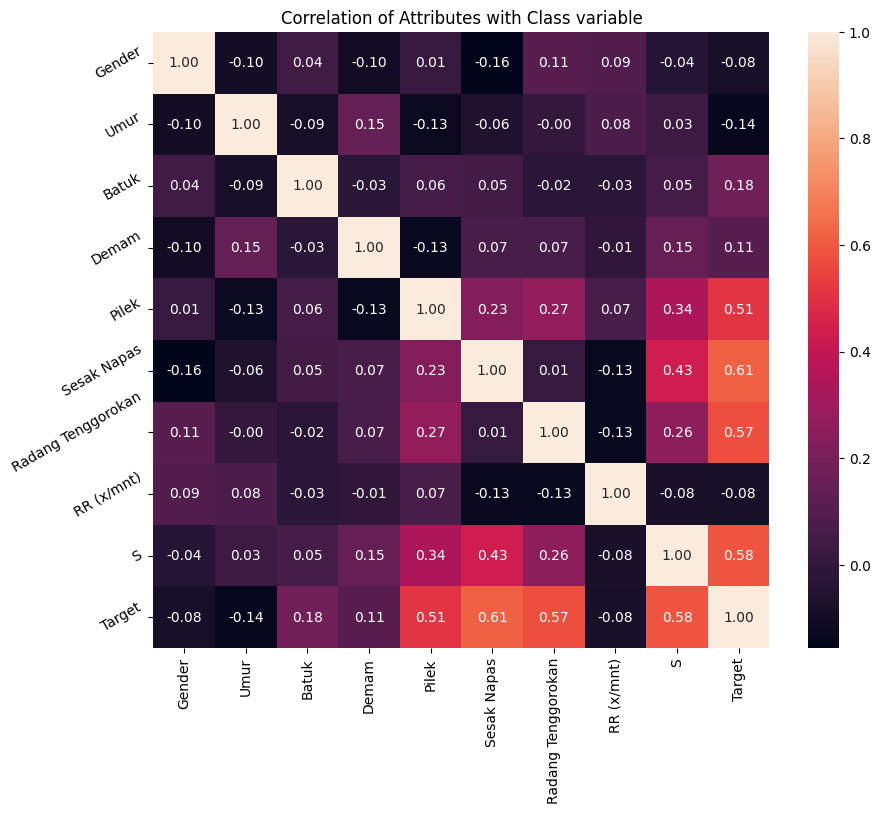

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# SMOTE (Synthetic Minority Over-samplingTechnique )

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

data = final_dataset

# Importing the dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, 9].values

# Display the class distribution before SMOTE
class_distribution_before = dict(Counter(y))
print("Class distribution before SMOTE:", class_distribution_before)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Get column names from the original DataFrame 'data'
column_names = data.columns[:-1].tolist()

# Convert the resampled data to a DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=column_names)
resampled_df['Target'] = y_resampled

# Display the class distribution after SMOTE
class_distribution_after = dict(Counter(y_resampled))
print("Class distribution after SMOTE:", class_distribution_after)

# You can now display the resampled dataset
print("Resampled dataset:")
print(resampled_df)

Class distribution before SMOTE: {0: 48, 1: 65}
Class distribution after SMOTE: {0: 65, 1: 65}
Resampled dataset:
     Gender      Umur  Batuk  Demam  Pilek  Sesak Napas  Radang Tenggorokan  \
0       0.0  0.726027    0.0    1.0    0.0          0.0                 1.0   
1       1.0  0.424658    0.0    1.0    0.0          0.0                 0.0   
2       0.0  0.150685    1.0    1.0    1.0          1.0                 0.0   
3       0.0  0.287671    1.0    1.0    0.0          1.0                 1.0   
4       0.0  0.438356    1.0    1.0    0.0          0.0                 0.0   
..      ...       ...    ...    ...    ...          ...                 ...   
125     0.0  0.487664    1.0    1.0    0.0          0.0                 0.0   
126     0.0  0.733698    1.0    1.0    0.0          0.0                 0.0   
127     0.0  0.453852    1.0    1.0    0.0          0.0                 0.0   
128     0.0  0.882377    1.0    1.0    0.0          0.0                 0.0   
129     1.0  0.26

# Klasifikasi

Untuk klasifikasi dalam dataset ispa ini menggunakan metode K-Nearest Neighbour, Naive Bayes, dan Decision Tree agar dapat dilakukan pembandingan hasil akurasi.

In [16]:
data = resampled_df

# Importing the dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, 9].values

print(X)
print(y)

[[0.         0.7260274  0.         ... 1.         1.         0.51428571]
 [1.         0.42465753 0.         ... 0.         1.         0.51428571]
 [0.         0.15068493 1.         ... 0.         1.         0.71428571]
 ...
 [0.         0.45385236 1.         ... 0.         1.         0.22857143]
 [0.         0.88237655 1.         ... 0.         1.         0.22857143]
 [1.         0.26896226 1.         ... 0.         1.         0.49357567]]
[0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [20]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((117, 9), (13, 9))

# K-Nearest Neighbour

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import time

# instantiate the model with Manhattan distance
knn = KNeighborsClassifier(n_neighbors=3, p=1) #p1 = Manhattan Distance

# record the start time
start_time = time.time()

# fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3, p=1)

In [25]:
y_pred = knn.predict(X_test)

print(y_pred)

[1 1 0 0 0 1 1 1 1 0 1 0 1]


In [26]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi KNN: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi KNN: {:.2f}%".format(precision * 100))
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall KNN: {:.2f}%".format(recall * 100))
f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 score KNN: {:.2f}%".format(f1 * 100))

# record the end time
end_time = time.time()

# calculate the runtime
runtime = end_time - start_time

print(f"Runtime K-Nearest Neighbors: {runtime:.2f} seconds")

Akurasi KNN: 100.00%
Presisi KNN: 100.00%
Recall KNN: 100.00%
f1 score KNN: 100.00%
Runtime K-Nearest Neighbors: 6.34 seconds


# Prediksi Model

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Gantilah dengan jumlah tetangga (n_neighbors) dan metrik yang sesuai
knn_model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Latih model KNN
knn_model.fit(X_train, y_train)

# Data baru yang akan diprediksi
new_data = new_data = [[0, 25, 0, 0, 1, 0, 0, 20, 38.2]]

new_df = pd.DataFrame(new_data)

# Lakukan prediksi pada data baru
predictions = knn_model.predict(new_df)

# Tampilkan hasil prediksi
print(f'Predictions for new data: {predictions}')

if (predictions[0]==0):
    print('Pasien Tidak Penumonia')
else:
    print('Pasien PENUMONIA AAAA')

Predictions for new data: [0]
Pasien Tidak Penumonia


# Simpan Model

In [77]:
import pickle

filename = 'prediksi_knn.sav'
pickle.dump(knn_model, open(filename,'wb'))

In [55]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4 0]
 [0 8]]


Text(0.5, 23.52222222222222, 'Predicted label')

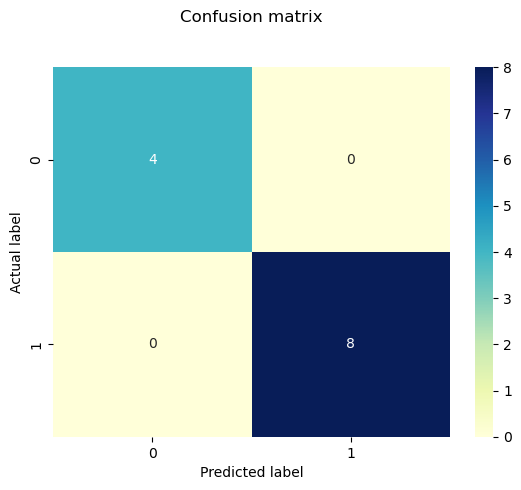

In [56]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
import time

# instantiate the model
gnb = GaussianNB()

# record the start time
start_time = time.time()

# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

In [28]:
y_pred = gnb.predict(X_test)

print(y_pred)

[1 1 0 1 0 1 1 1 1 0 1 0 1]


In [29]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi Naive Bayes: {:.2f}%".format(precision * 100))
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall Naive Bayes: {:.2f}%".format(recall * 100))
f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 score Naive Bayes: {:.2f}%".format(f1 * 100))

# record the end time
end_time = time.time()

# calculate the runtime
runtime = end_time - start_time

print(f"Runtime Naive Bayes: {runtime:.2f} seconds")

Akurasi Naive Bayes: 92.31%
Presisi Naive Bayes: 93.16%
Recall Naive Bayes: 92.31%
f1 score Naive Bayes: 92.11%
Runtime Naive Bayes: 5.50 seconds


# Prediksi Model

In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Gantilah dengan parameter yang sesuai
naive_bayes_model = GaussianNB()

# Latih model Naive Bayes
naive_bayes_model.fit(X_train, y_train)

# Data baru yang akan diprediksi
new_data = new_data = [[0, 0.479452, 1, 1, 0, 0, 0, 1, 0.228571]]

new_df = pd.DataFrame(new_data)

# Lakukan prediksi pada data baru
predictions = naive_bayes_model.predict(new_df)

# Tampilkan hasil prediksi
print(f'Predictions for new data: {predictions}')

if (predictions[0]==0):
    print('Pasien Tidak Penumonia')
else:
    print('Pasien PENUMONIA AAAA')

Predictions for new data: [0]
Pasien Tidak Penumonia


# Simpan Model

In [119]:
import pickle

filename = 'prediksi_naive_bayes.sav'
pickle.dump(naive_bayes_model, open(filename,'wb'))

In [60]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4 0]
 [0 8]]


Text(0.5, 23.52222222222222, 'Predicted label')

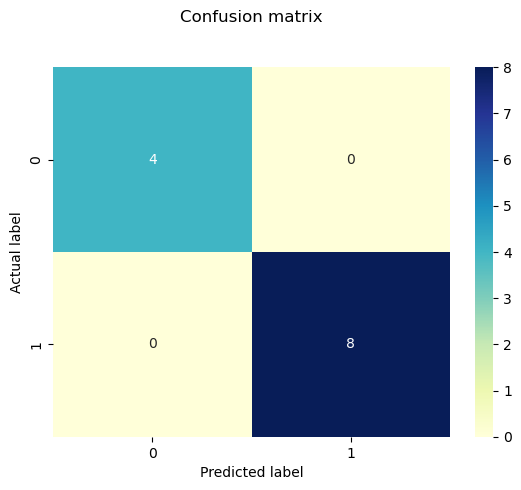

In [61]:
y_pred = gnb.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Decision Tree

In [30]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
import time

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

# record the start time
start_time = time.time()

# fit the model
clf_en.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
y_pred_en = clf_en.predict(X_test)
print(y_pred_en)

[1 1 0 0 0 1 1 1 1 0 1 0 1]


In [32]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_en)
print("Akurasi Decision Tree: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred_en, average='weighted')
print("Presisi Decision Tree: {:.2f}%".format(precision * 100))
recall = recall_score(y_test, y_pred_en, average='weighted')
print("Recall Decision Tree: {:.2f}%".format(recall * 100))
f1 = f1_score(y_test, y_pred_en, average='weighted')
print("f1 score Decision Tree: {:.2f}%".format(f1 * 100))

# record the end time
end_time = time.time()

# calculate the runtime
runtime = end_time - start_time

print(f"Runtime Decision Tree: {runtime:.2f} seconds")

Akurasi Decision Tree: 100.00%
Presisi Decision Tree: 100.00%
Recall Decision Tree: 100.00%
f1 score Decision Tree: 100.00%
Runtime Decision Tree: 4.41 seconds


# Prediksi Model

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Gantilah dengan parameter yang sesuai
decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

# Latih model Decision Tree
decision_tree_model.fit(X_train, y_train)

# Data baru yang akan diprediksi
new_data = new_data = [[0, 67, 0, 1, 0, 0, 1, 20, 37.5]]

new_df = pd.DataFrame(new_data)

# Lakukan prediksi pada data baru
predictions = decision_tree_model.predict(new_df)

# Tampilkan hasil prediksi
print(f'Predictions for new data: {predictions}')

if (predictions[0]==0):
    print('Pasien Tidak Penumonia')
else:
    print('Pasien PENUMONIA AAAA')

Predictions for new data: [0]
Pasien Tidak Penumonia


# Simpan Model

In [117]:
import pickle

filename = 'prediksi_decision_tree.sav'
pickle.dump(decision_tree_model, open(filename,'wb'))

[Text(0.625, 0.9375, 'x[5] <= 0.5\nentropy = 0.988\nsamples = 101\nvalue = [44, 57]'),
 Text(0.5, 0.8125, 'x[6] <= 0.5\nentropy = 0.918\nsamples = 66\nvalue = [44, 22]'),
 Text(0.25, 0.6875, 'x[8] <= 0.614\nentropy = 0.348\nsamples = 46\nvalue = [43, 3]'),
 Text(0.125, 0.5625, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.375, 0.5625, 'x[1] <= 0.418\nentropy = 0.696\nsamples = 16\nvalue = [13, 3]'),
 Text(0.25, 0.4375, 'x[1] <= 0.144\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.125, 0.3125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.3125, 'x[1] <= 0.233\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.1875, 'x[8] <= 0.757\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.1875, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.4375, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),

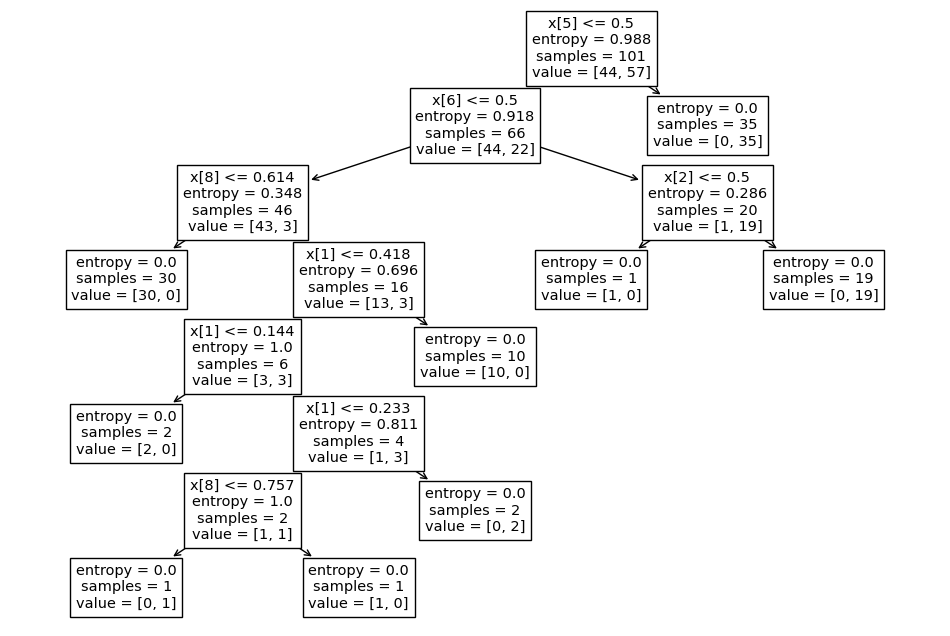

In [65]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [66]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4 0]
 [0 8]]


Text(0.5, 23.52222222222222, 'Predicted label')

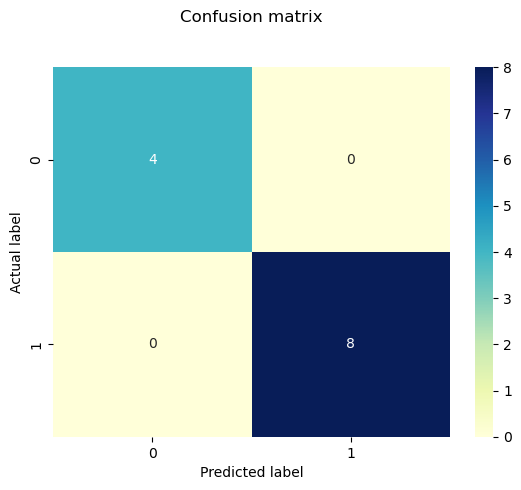

In [67]:
y_pred = clf_en.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')